In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/data-science-steps-to-follow-part02':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/data-science-steps-to-follow-part02')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_122322/1298565937.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

In [2]:
#| label: data-explorer
#| code-fold: show
#| code-summary: Show/hide code for interactive data explorer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Generate sample data
np.random.seed(42)
n_samples = 1000

data = {
    'age': np.random.normal(35, 10, n_samples),
    'income': np.random.lognormal(10, 1, n_samples),
    'education_years': np.random.randint(8, 22, n_samples),
    'satisfaction': np.random.randint(1, 6, n_samples)
}

df = pd.DataFrame(data)

# Create interactive scatter plot
fig = px.scatter(df, x='age', y='income', 
                 color='satisfaction',
                 size='education_years',
                 hover_data=['education_years'],
                 title='Interactive Feature Relationships')
fig.show()

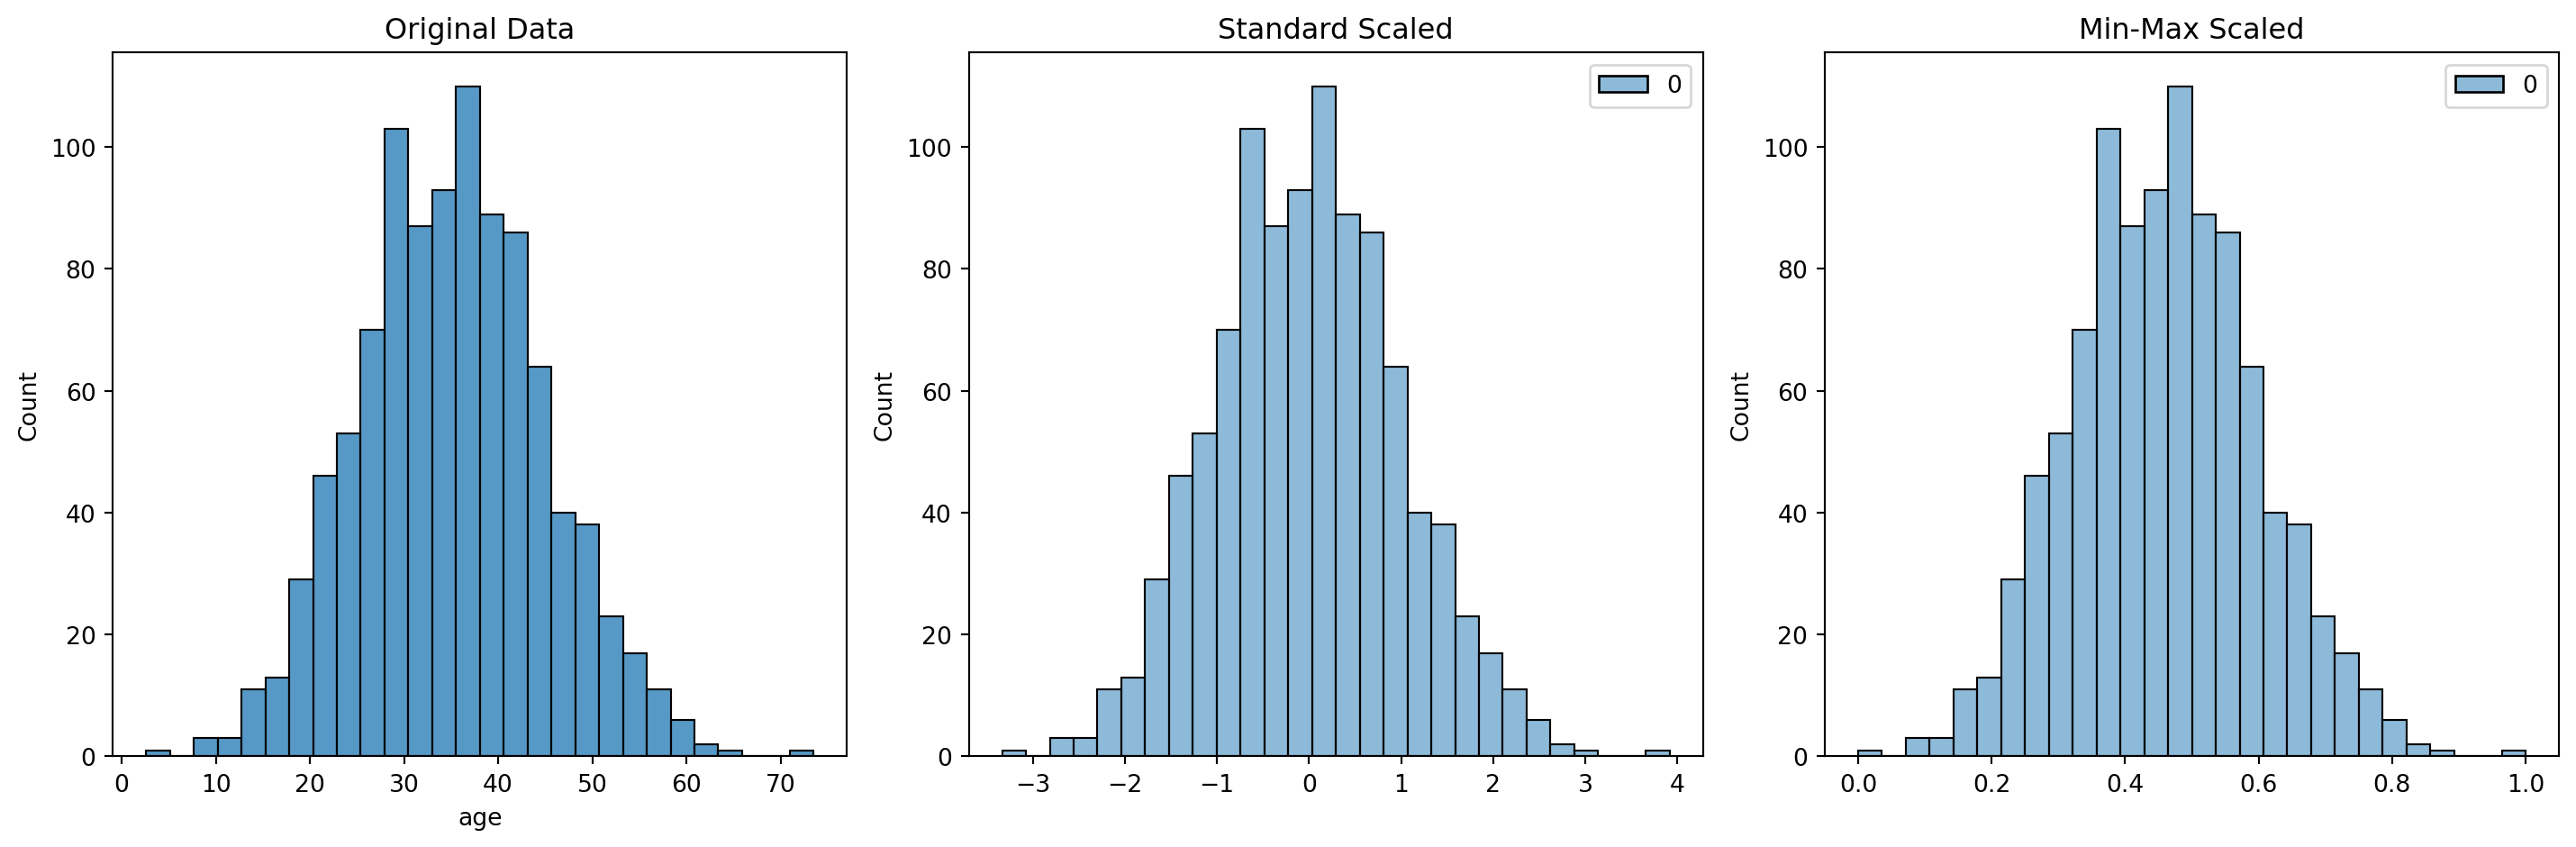

In [3]:
#| code-fold: true
#| code-summary: "Show/hide scaling comparison code"

def compare_scaling_methods(data):
    # Original data
    original = data['age'].copy()
    
    # Standard scaling
    scaler = StandardScaler()
    standard_scaled = scaler.fit_transform(original.values.reshape(-1, 1))
    
    # Min-max scaling
    min_max_scaler = MinMaxScaler()
    minmax_scaled = min_max_scaler.fit_transform(original.values.reshape(-1, 1))
    
    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original distribution
    sns.histplot(original, ax=axes[0])
    axes[0].set_title('Original Data')
    
    # Standard scaled
    sns.histplot(standard_scaled, ax=axes[1])
    axes[1].set_title('Standard Scaled')
    
    # Min-max scaled
    sns.histplot(minmax_scaled, ax=axes[2])
    axes[2].set_title('Min-Max Scaled')
    
    plt.tight_layout()
    plt.show()

compare_scaling_methods(df)

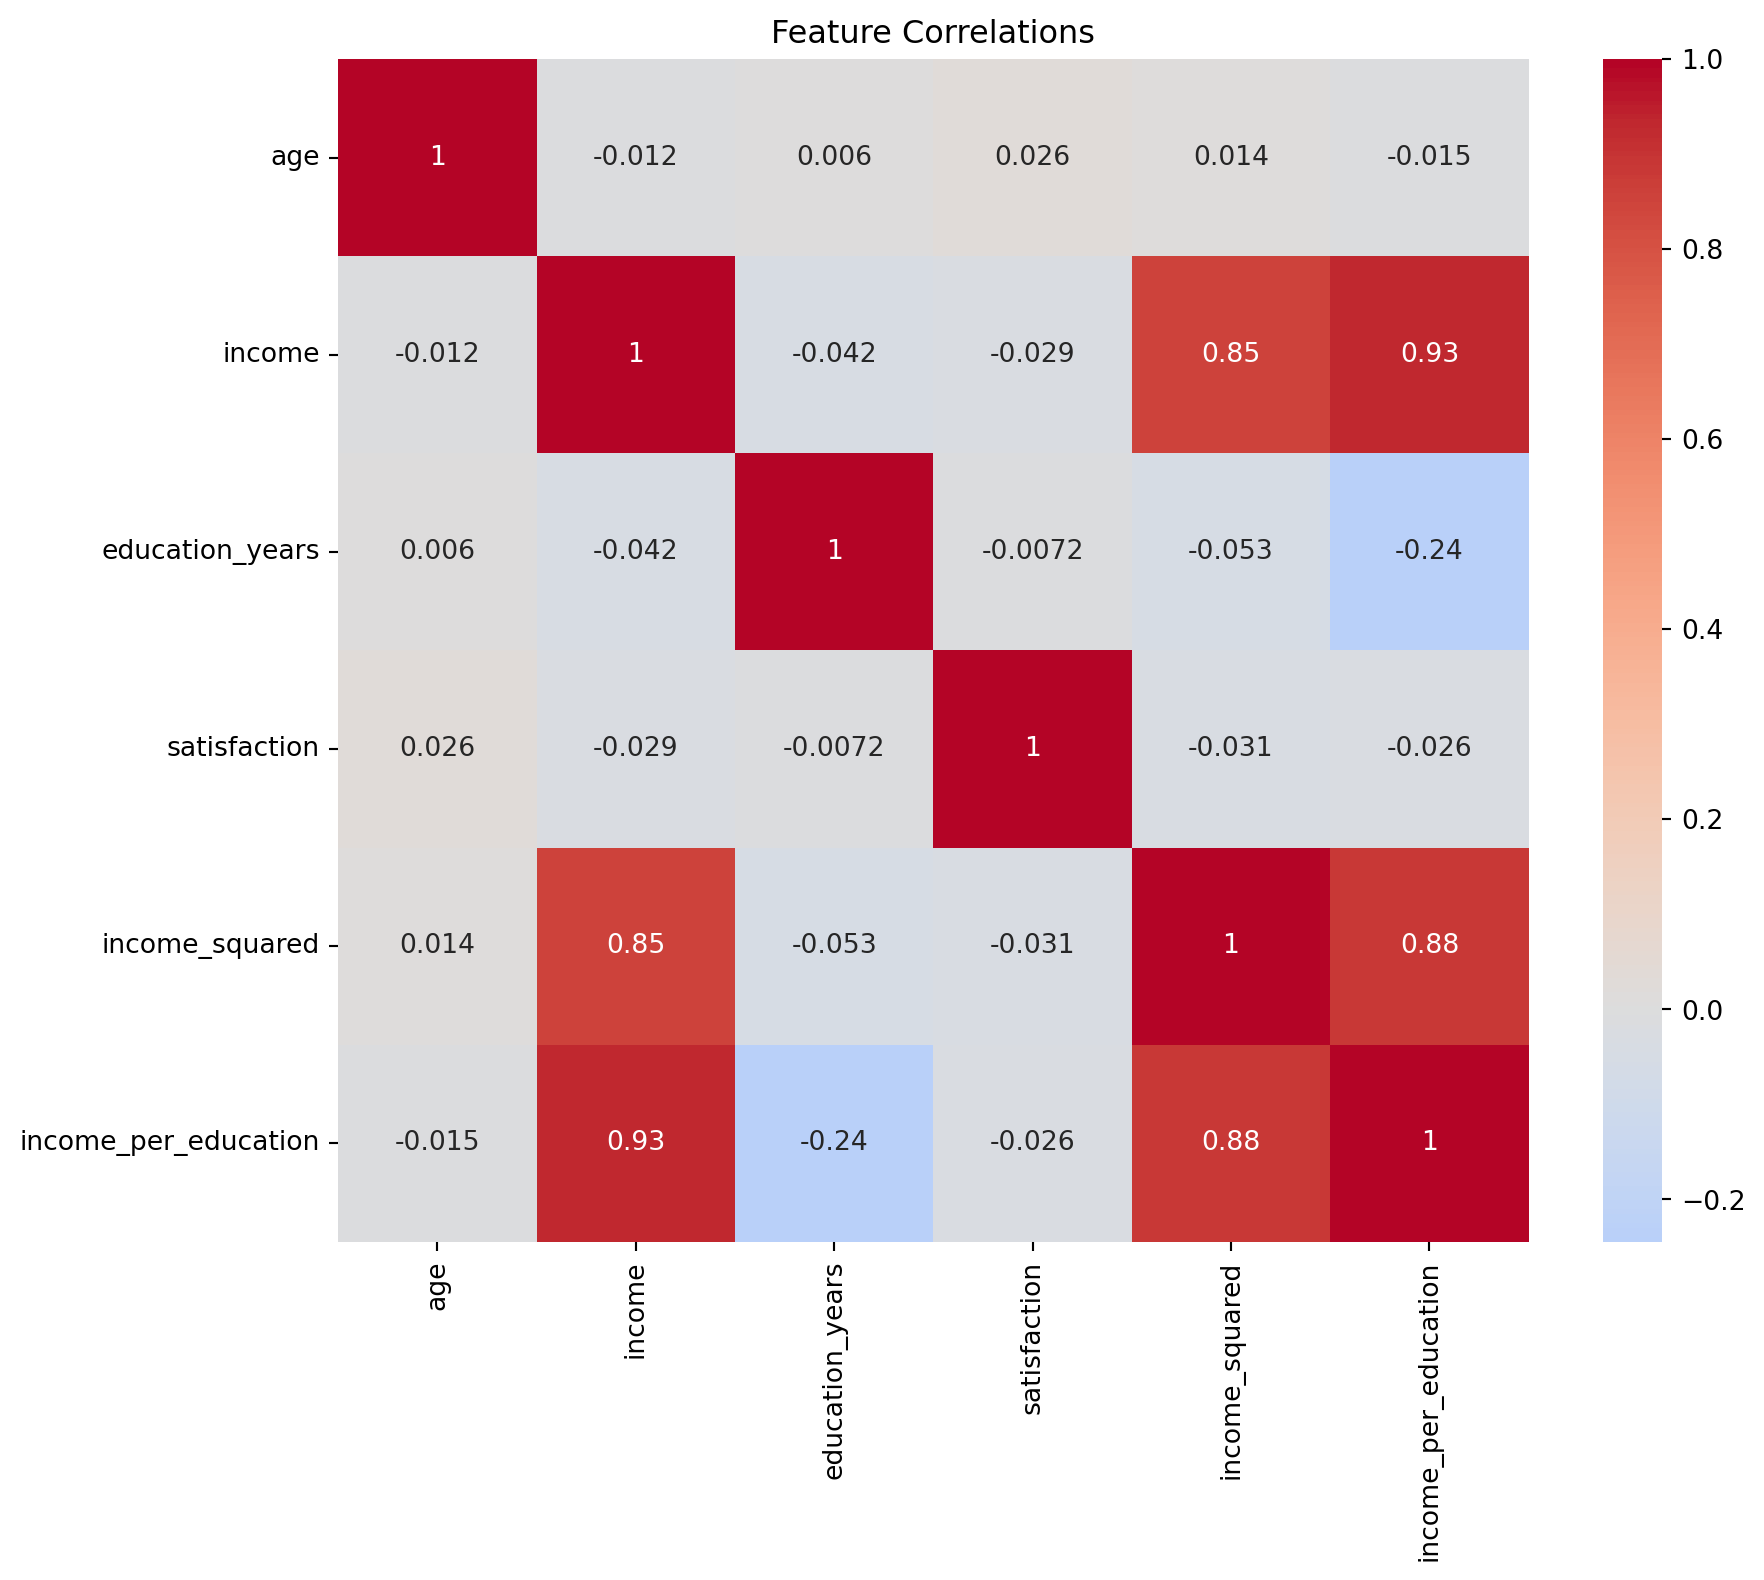

In [4]:
#| code-fold: true
#| code-summary: "Show/hide feature generation code"

def generate_features(df):
    """Generate new features from existing ones"""
    # Polynomial features
    df['income_squared'] = df['income'] ** 2
    
    # Interaction features
    df['income_per_education'] = df['income'] / df['education_years']
    
    # Binning
    df['age_group'] = pd.qcut(df['age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elder'])
    
    return df

# Generate new features
df_featured = generate_features(df.copy())

# Show correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_featured.select_dtypes(include=[np.number]).corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

In [5]:
#| code-fold: true
#| code-summary: "Show/hide feature selection tool"
from sklearn.feature_selection import SelectKBest, f_regression

def plot_feature_importance(X, y, k=5):
    """Plot top k most important features"""
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    # Get feature scores
    scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)
    
    # Create interactive bar plot
    fig = px.bar(scores, x='Feature', y='Score',
                 title=f'Top {k} Most Important Features',
                 labels={'Score': 'Importance Score'})
    fig.show()

# Example usage
X = df_featured.select_dtypes(include=[np.number]).drop('satisfaction', axis=1)
y = df_featured['satisfaction']
plot_feature_importance(X, y)